# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

15

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

7 loot boxes to get an elixir

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

X is discrete random variable because it comes with a finite value with a random process

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

Binomial, it have the success and failure rate like Bernoulli but with the number of trials as well (100 loot boxes), and will sum up the chances of success (number of elixir)

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

Probability of getting more than 20 elixirs: 0.06631976581888199


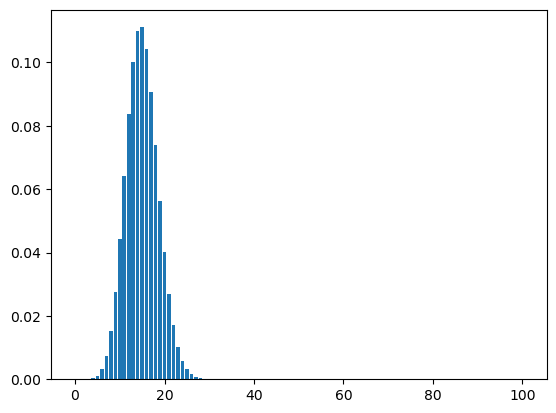

In [2]:
# Show your work; leave your answer in a comment.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

p_elixir = 0.15
num_lootbox = 100

elixir_distn = stats.binom(num_lootbox, p_elixir)

possible_elixir = list(range(0, num_lootbox + 1))
pmf_values = elixir_distn.pmf(possible_elixir)
plt.bar(possible_elixir, pmf_values)

# Calculate the probability of getting more than 20 elixirs
p_pmf_more_than_20 = 1 - sum(pmf_values[:21])

print("Probability of getting more than 20 elixirs:", p_pmf_more_than_20)


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

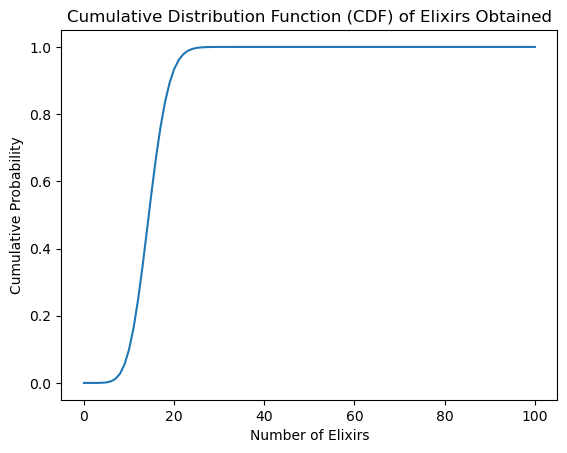

Probability of getting more than 20 elixirs: 0.06631976581888177


In [3]:
# Show your work; leave your answer in a comment.
cdf_values = elixir_distn.cdf(possible_elixir)
plt.plot(possible_elixir, cdf_values)
p_cdf_more_than_20 = 1 - elixir_distn.cdf(20)

plt.xlabel('Number of Elixirs')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Elixirs Obtained')

plt.show()

print("Probability of getting more than 20 elixirs:", p_cdf_more_than_20)

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

The chance is around 7%

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

The Poisson distribution is suitable for modeling the number of events occurring in a fixed interval of time or space, given the average rate at which events occur and the independence of each event. In this case, the events are the purchases of loot boxes by users. The average rate of occurrence represents the average number of loot boxes purchased per user last month.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [4]:
# Show your work; leave your answer in a comment.
import math

# Average number of loot boxes purchased per user
average_loot_boxes_per_user = 2.7

# Price per loot box
price_per_loot_box = 1

# Target revenue
target_revenue = 500000

# Calculate the expected revenue per user
expected_revenue_per_user = average_loot_boxes_per_user * price_per_loot_box

# Calculate the number of users needed
number_of_users = target_revenue / expected_revenue_per_user
number_of_users_rounded = math.ceil(number_of_users / 1000) * 1000  # Round up to the nearest thousand

# Print the result
print("Number of users needed:", number_of_users_rounded)

Number of users needed: 186000


#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

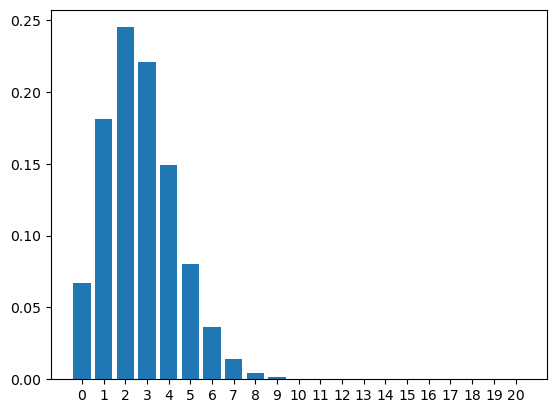

In [23]:
# Show your work; leave your answer in a comment.
target_revenue = 500000
price_per_loot_box = 1
average_loot_boxes_per_user = 2.7
rev_per_user = price_per_loot_box * average_loot_boxes_per_user

# Calculate the probability of a user who buys 0 to 20 boxes during the game last month
purchase_stats = stats.poisson(rev_per_user)
n_box = list(range(0,21))
purchase_prob = np.array([purchase_stats.pmf(box) for box in n_box])

# Plot the probability of a user who buys 0 to 20 boxes during the game last month
plt.bar(n_box, purchase_stats.pmf(n_box))
plt.xticks(n_box);


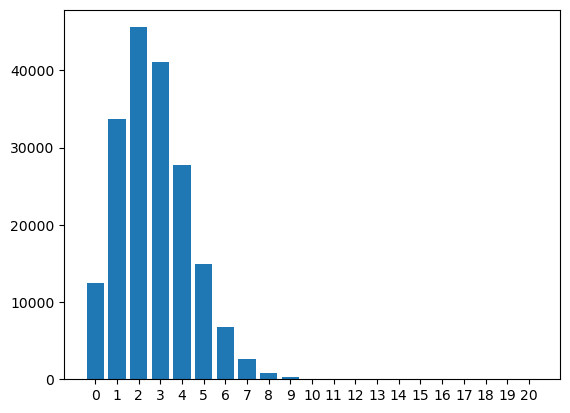

In [27]:
# Plot the number of users who bought 0 to 20 boxes during the game last month
n_buyer = purchase_prob * number_of_users_rounded
plt.bar(n_box, n_buyer)
plt.xticks(n_box);

In [30]:
rev_stats = np.array(n_box * 1) * np.array(n_buyer)
rev_stats

array([0.00000000e+00, 3.37506085e+04, 9.11266429e+04, 1.23020968e+05,
       1.10718871e+05, 7.47352380e+04, 4.03570285e+04, 1.81606628e+04,
       7.00482710e+03, 2.36412915e+03, 7.09238744e+02, 1.91494461e+02,
       4.70031858e+01, 1.05757168e+01, 2.19649503e+00, 4.23609756e-01,
       7.62497560e-02, 1.28671463e-02, 2.04360559e-03, 3.06540839e-04,
       4.35610666e-05])

In [32]:
hvu_min_purchase = 5
hvu_rev = sum(rev_stats[hvu_min_purchase:])
print(f'The revenue from High Value User is {round(hvu_rev)}')
lvu_rev = sum(rev_stats[:hvu_min_purchase])
print(f'The revenue from Low Value User is {round(lvu_rev)}')

The revenue from High Value User is 143583
The revenue from Low Value User is 358617


The proportion of users are: High: 13.71% and Low: 86.29% 
With the proportion, high value user is $68546 and low value user is $431454


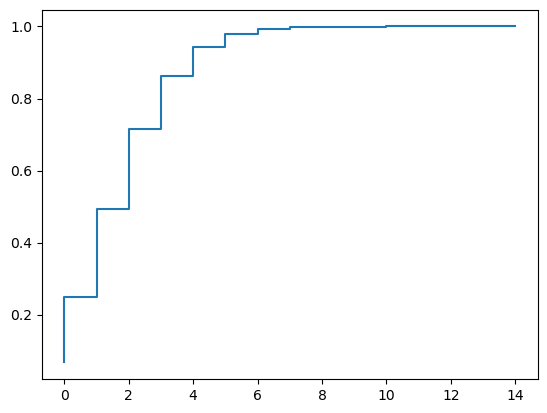

In [33]:
n_boxes = 2.7
box_dist = stats.poisson(n_boxes)
# to find out the proportion of high value and low value users
high_value_users = 1 - box_dist.cdf(4)
low_value_users = box_dist.cdf(4)
print(f'The proportion of users are: High: {high_value_users:.2%} and Low: {low_value_users:.2%} \nWith the proportion, high value user is ${high_value_users * 500000:.0f} and low value user is ${low_value_users * 500000:.0f}')
list_box = list(range(15))
plt.step(list_box, box_dist.cdf(list_box));

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

Most people will buy 3 lootboxes in average.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [35]:
loot_boxes_to_elixir = []
num_simulations = 100_000

for _ in range(num_simulations):
    loot_boxes_opened = 0
    while True:
        loot_boxes_opened += 1
        # Open a loot box and check if it contains an elixir
        if np.random.choice([True, False], p=[0.15, 0.85]):
            # If it contains an elixir, record the number of loot boxes opened and break the loop
            loot_boxes_to_elixir.append(loot_boxes_opened)
            break

# Calculate percentiles
percentiles = np.percentile(loot_boxes_to_elixir, [5, 25, 50, 75, 95])

# Print percentiles
print("5th percentile:", percentiles[0])
print("25th percentile:", percentiles[1])
print("50th percentile (median):", percentiles[2])
print("75th percentile:", percentiles[3])
print("95th percentile:", percentiles[4])

5th percentile: 1.0
25th percentile: 2.0
50th percentile (median): 5.0
75th percentile: 9.0
95th percentile: 19.0


**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

The best Python datatype to store this data would be a dictionary. A dictionary allows us to map each item to the corresponding number of trials it took to obtain that item. This way, we can easily retrieve the number of trials for each item by using the item name as the key.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

1. Revenue
2. Number of Players
3. Game balance
4. Item Aquisition
5. Player Satisfaction